In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optical_element_io import *
from column_io import OpticalColumn
from calculate_optical_properties import calc_properties_optics
from automation import optimize_many_shapes
from automation_library import calculate_c3
from importlib import reload
from misc_library import choose_logger
import logging
import sys

In [3]:
tl = StrongMagLens('/home/trh/data/transfer/transfer01_110_repeat.dat')
tl.write('/home/trh/data/transfer/transfer01_110_repeat_test.dat')
col = OpticalColumn(tl)
col.write_opt_img_cond_file('/home/trh/data/transfer/opt_col01_test.dat',img_pos=30,tl_pos=-30,energy=30000)

Reading file /home/trh/data/transfer/transfer01_110_repeat.dat 
with title: MAGNETIC SATURATED CIRCUIT (ASYMMETRIC LENS)
Warning! This data file seems to have curvature coordinates. Setting so=True.


In [4]:
tl.calc_field()
calc_properties_optics(col)
col.read_optical_properties()

optical_element_io:calc_field:846: 

     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


      SOMLENSS Module    For Computing Vector Potential Distribution
      ----------------   -------------------------------------------
                    

In [5]:
print(col.c3)
print(col.f)

585.973


In [6]:
col.write_raytrace_file("/home/trh/data/transfer/opt_col01_test.dat",lens_type='magnetic',initial_direction=0,
                        minimum_rays=True,source_pos=-30,screen_pos=40,energy=30000,
                        lens_excitation=col.lens_curr)
col.calc_rays()

column_io:calc_rays:111: 

     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


SORAY Module    For Computing Trajectories in Electrostatic and Magnetic Lenses
-------------   ---------------------------------------------------------------
        

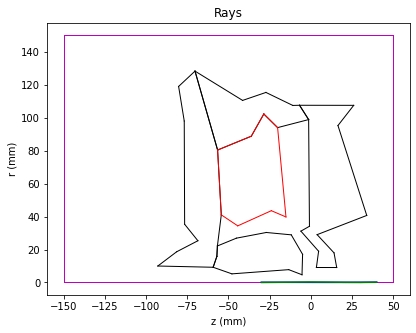

In [7]:
col.plot_rays(coarse_mesh=False,boundary_mesh=True,savefile='/home/trh/data/transfer/transfer_and_rays.png')

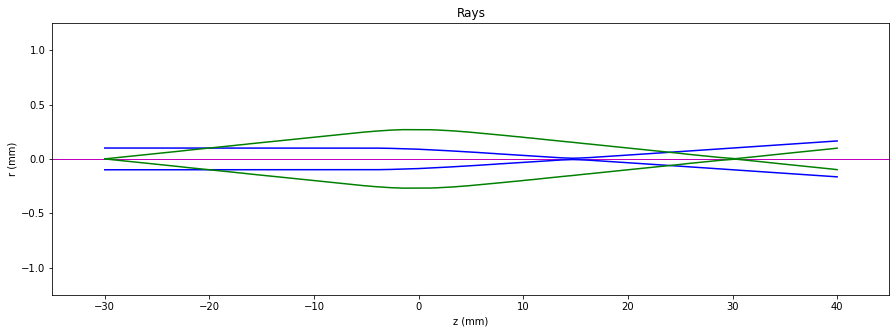

In [8]:
col.plot_rays(ylim=[-1.25,1.25],xlim=[-35,45],equal_aspect=False,coarse_mesh=False,boundary_mesh=True,mirror=True,savefile='/home/trh/data/transfer/only_rays.png')

In [22]:
help(col.write_raytrace_file)

Help on method write_raytrace_file in module column_io:

write_raytrace_file(mircondfilename, source_pos=90, source_size=200, semiangle=10, energy=200000, initial_direction=180, lens_type='Electrostatic', lens_pos=0, lens_excitation=None, excitation_flag=None, potentials=None, screen_pos=95, relativity=False, cyl_symm=True, r_samples=3, alpha_samples=3, minimum_rays=False, precision=8, n_equipotentials=50) method of column_io.OpticalColumn instance
    Creates an input file for SORAY.exe. Primarily for visualizing columns
    implemented in MIRROR. All physical parameters have same name, units
    and default as in write_mir_img_cond_file(), even when SORAY does not
    share units with MIRROR.
    
    Parameters:
        mircondfilename : path
            full filename to write imaging conditions file to.
    
    Optional parameters:
        source_pos : float
            Source z position (mm). The "source" is the starting 
            position of rays for auto-focusing. 
         